# Data 620, Project Two: Two Node Network Analysis
Author: Kevin Kirby

[I chose the weighted static two-node network (weighted by number of messages) datast from Tore Opsahl's repository](https://toreopsahl.com/datasets/)

## Imports and Setup

In [1]:
import pandas as tian
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
fb_likes_df = tian.read_csv(
    '/Users/kevinkirby/Desktop/local_files/cuny_local/data_620/week3/fb_weighted_twonode.txt',
    sep=" ",
    header=None, 
    names=["source", "target", "weight"],
    )

fb_likes_df

,source,target,weight
0,1,1,1
1,1,39,9
2,1,102,2
3,1,154,1
4,1,357,5
...,...,...,...
7084,896,156,1
7085,896,407,1
7086,897,59,4
7087,898,357,1


## Pre-Reduction Graph

In [3]:
fb_graph = nx.from_pandas_edgelist(
    fb_likes_df, 
    source="source", 
    target="target", 
    edge_attr="weight", 
    create_using=nx.Graph())

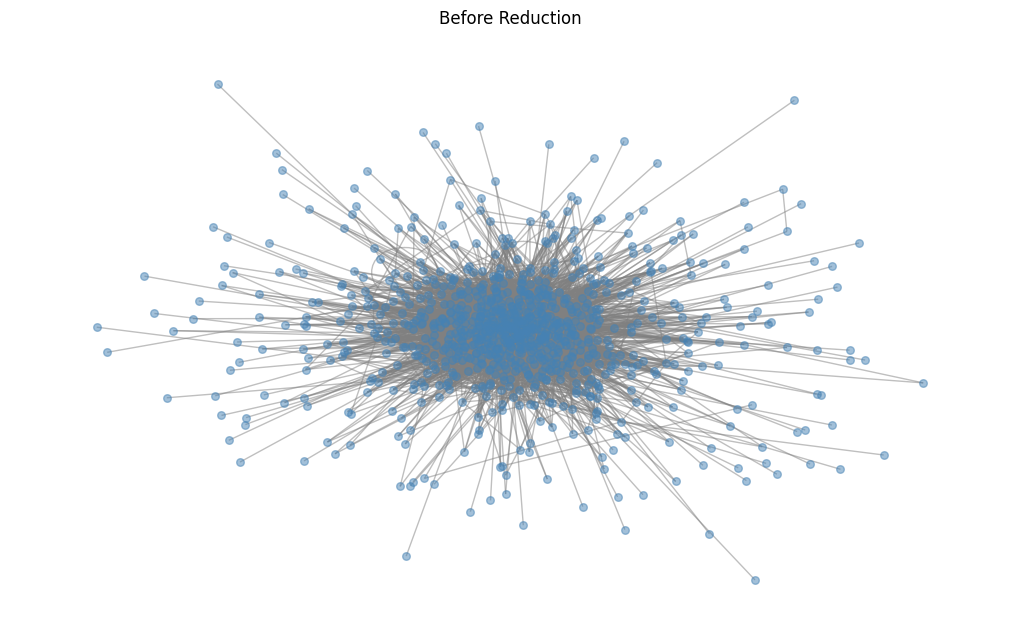

In [4]:
plt.figure(figsize=(10, 6))
pos = nx.spring_layout(fb_graph, seed=42)
nx.draw(fb_graph, pos, node_size=30, with_labels=False, node_color='steelblue', edge_color='grey', alpha=0.5)
plt.title("Before Reduction")
plt.show()

## Island Reduction Method

### Three Edge Weight

In [5]:
three_weight = 3
fb3_isl_graph = nx.Graph()
fb3_isl_graph.add_edges_from((u, v, d) for u, v, d in fb_graph.edges(data=True) if d["weight"] >= three_weight)

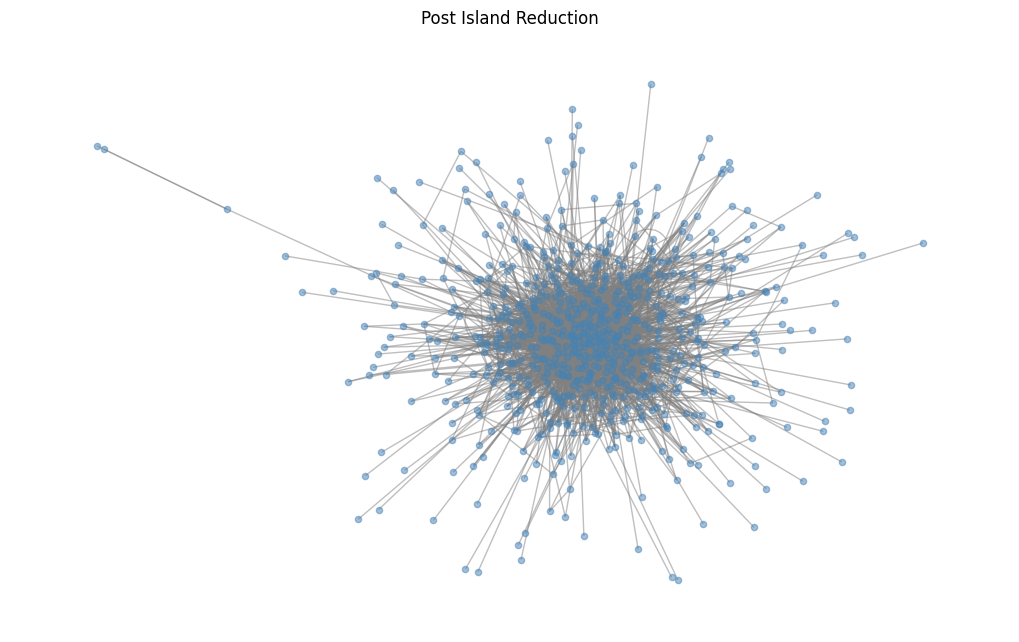

In [6]:
plt.figure(figsize=(10, 6))
pos3_island = nx.spring_layout(fb3_isl_graph, seed=42)
nx.draw(fb3_isl_graph, pos3_island, node_size=20, with_labels=False, node_color='steelblue', edge_color='grey', alpha=0.5)
plt.title("Post Island Reduction")
plt.show()

### Four Edge Weight

In [7]:
four_weight = 4
fb4_isl_graph = nx.Graph()
fb4_isl_graph.add_edges_from((u, v, d) for u, v, d in fb_graph.edges(data=True) if d["weight"] >= four_weight)

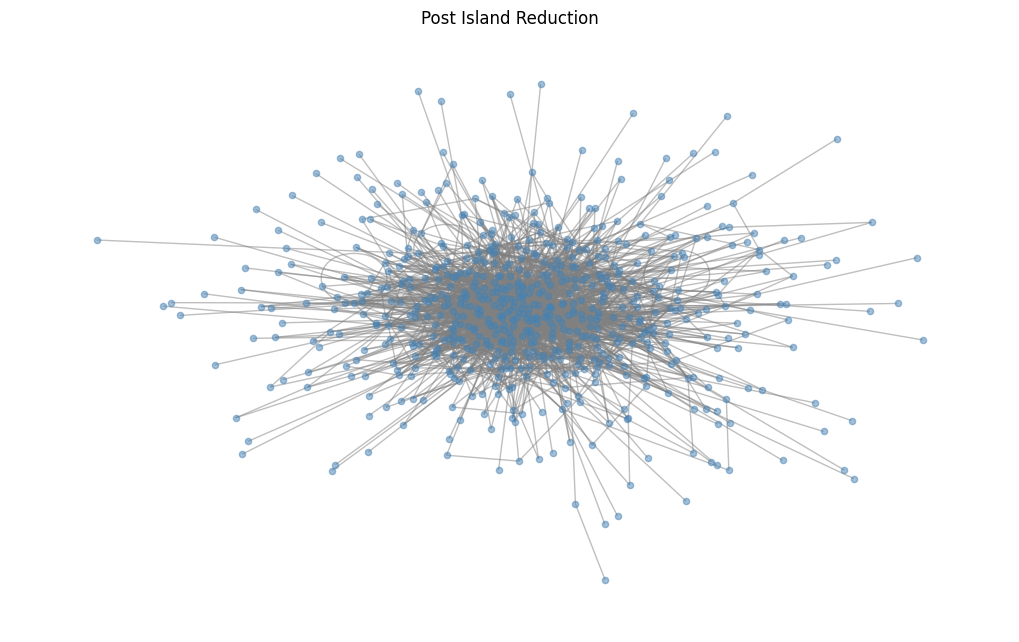

In [8]:
plt.figure(figsize=(10, 6))
pos4_island = nx.spring_layout(fb4_isl_graph, seed=42)
nx.draw(fb4_isl_graph, pos4_island, node_size=20, with_labels=False, node_color='steelblue', edge_color='grey', alpha=0.5)
plt.title("Post Island Reduction")
plt.show()

## Analysis

From the original graph on through the four weight reduction, I see an increasingly compact network. It has the same sort of intensity all the way through because the reductions are eliminating weaker points in the graph. I thought it would consolidate but also would become more sparse.

What I'm left with are only the most engaged users who represent the core of the social network. This general reason is most likely why Twitter (X) has always punched above its weight; the most engaged users remain and keep talking to each other and the weak points that dropped off were never important to begin with.
